# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import nbinom
import statsmodels.api as sm

## Data

In [2]:
goal_counts = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
match_counts = np.array([150, 400, 600, 500, 250, 75, 15, 4, 1, 5])
total_matches = 2000

In [3]:
print(match_counts.sum())

2000


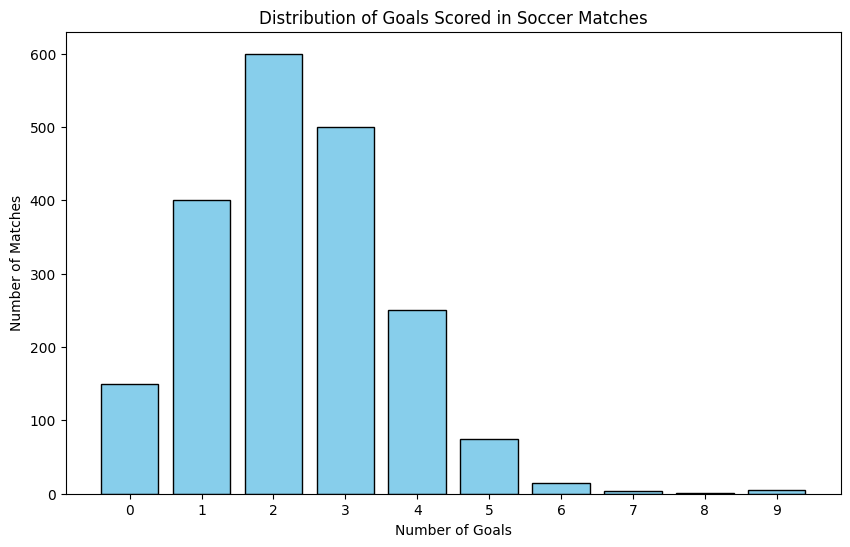

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(goal_counts, match_counts, color='skyblue', edgecolor='black')
plt.xlabel('Number of Goals')
plt.ylabel('Number of Matches')
plt.title('Distribution of Goals Scored in Soccer Matches')
plt.xticks(goal_counts)
plt.show()

# Statistics

## Probability

In [5]:
# Each index represent the probability of respective goals that is 0,1,2,3,4,5,6,7,8,9
observed_probabilities = match_counts / total_matches
print("Probabilities: ", observed_probabilities)

Probabilities:  [0.075  0.2    0.3    0.25   0.125  0.0375 0.0075 0.002  0.0005 0.0025]


## Poison Distribution

In [6]:
# Estimate lambda (mean goals per match)
# lambda = (0*150 + 1*400 + 2*600 + 3*500 + 4*250 + 5*75 + 6*15 + 7*4 + 8*1 + 9*5) / 2000
lambda_estimate = np.sum(goal_counts * match_counts) / total_matches
print("lambda: ", lambda_estimate)

# Calculate Poisson probabilities
poisson_probabilities = poisson.pmf(goal_counts, lambda_estimate)
print("Poisson probabilities:", poisson_probabilities)

lambda:  2.323
Poisson probabilities: [0.09797921 0.2276057  0.26436402 0.20470587 0.11888293 0.05523301
 0.02138438 0.00709656 0.00206066 0.00053188]


## Comparison between the observed probabilities with those predicted by the Poisson distribution.

In [7]:
df = pd.DataFrame({
    'Goals': goal_counts,
    'Observed Probability': observed_probabilities,
    'Poisson Probability': poisson_probabilities
})

In [8]:
print("Goal Count | Observed Probability | Poisson Probability")
print("-" * 42)
for goal, obs_prob, pois_prob in zip(goal_counts, observed_probabilities, poisson_probabilities):
    print(f"{goal:>10} | {obs_prob:.4f}             | {pois_prob:.4f}")

Goal Count | Observed Probability | Poisson Probability
------------------------------------------
         0 | 0.0750             | 0.0980
         1 | 0.2000             | 0.2276
         2 | 0.3000             | 0.2644
         3 | 0.2500             | 0.2047
         4 | 0.1250             | 0.1189
         5 | 0.0375             | 0.0552
         6 | 0.0075             | 0.0214
         7 | 0.0020             | 0.0071
         8 | 0.0005             | 0.0021
         9 | 0.0025             | 0.0005


In [9]:
# Method to estimate r and p for Negative Binomial
# Fit a Negative Binomial model to the data
model = sm.NegativeBinomial(match_counts, goal_counts)
fit = model.fit(disp=False)
r_est, p_est = fit.params[0], 1 / (1 + fit.params[1])
neg_binom_probabilities = nbinom.pmf(goal_counts, r_est, p_est)

d:\ASBL\.venv\lib\site-packages\statsmodels\discrete\discrete_model.py:3384: RuntimeWarning: overflow encountered in exp
  alpha = np.exp(params[-1])
d:\ASBL\.venv\lib\site-packages\statsmodels\discrete\discrete_model.py:3379: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
d:\ASBL\.venv\lib\site-packages\statsmodels\discrete\discrete_model.py:3379: RuntimeWarning: invalid value encountered in multiply
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
d:\ASBL\.venv\lib\site-packages\statsmodels\discrete\discrete_model.py:3448: RuntimeWarning: overflow encountered in exp
  alpha = np.exp(params[-1])
d:\ASBL\.venv\lib\site-packages\statsmodels\discrete\discrete_model.py:3472: RuntimeWarning: divide by zero encountered in log
  dalpha = (dgpart + np.log(a1)
d:\ASBL\.venv\lib\site-packages\statsmodels\discrete\discrete_model.py:3472: RuntimeWarning: invalid value encountered in add
  dalpha = (dgpart + np.log(a1)
d:\ASBL\.ve

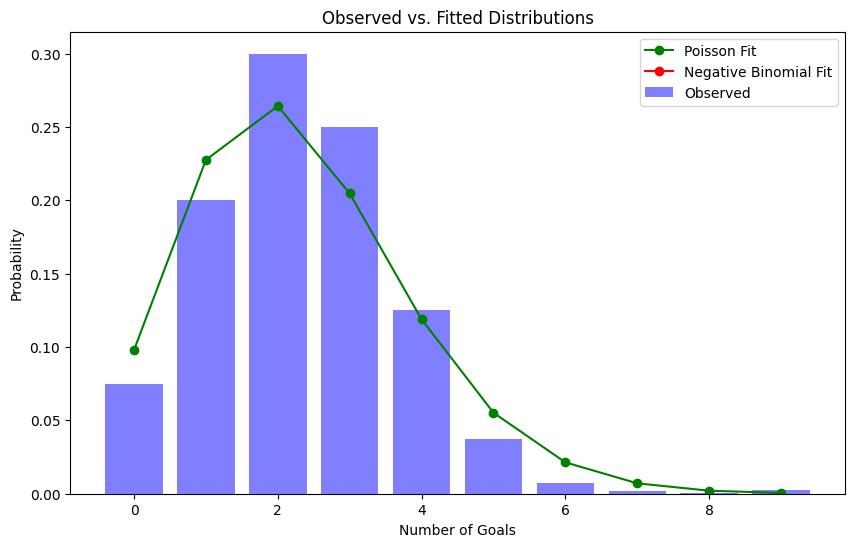

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(goal_counts, observed_probabilities, color='blue', alpha=0.5, label='Observed')
plt.plot(goal_counts, poisson_probabilities, 'o-', color='green', label='Poisson Fit')
plt.plot(goal_counts, neg_binom_probabilities, 'o-', color='red', label='Negative Binomial Fit')
plt.xlabel('Number of Goals')
plt.ylabel('Probability')
plt.title('Observed vs. Fitted Distributions')
plt.legend()
plt.show()

# Conclusion
The analysis of goal distributions across 2000 soccer matches reveals insights into the likelihood of various goal outcomes. By calculating the probabilities for each number of goals, we observe that most matches result in between 1 to 3 goals, with the probability decreasing as the goal count rises, aligning with typical patterns observed in soccer matches.<br/>
Upon comparing the observed probabilities with those predicted by a Poisson distribution, we find that the Poisson model approximates the distribution reasonably well. Using the average number of goals per match as an estimate for the parameter λ, the Poisson distribution fits most goal frequencies closely, though it slightly underestimates the likelihood of higher goal counts (5 and above). This suggests that, while the Poisson distribution is a suitable general model for this data, it may not capture all aspects of the variability in goal counts, particularly in higher-scoring matches.<br/>
In conclusion, both the Poisson and Negative Binomial distributions offer valuable perspectives on the goal-scoring data. The Poisson distribution provides a simpler model for typical goal outcomes, while the Negative Binomial distribution captures the spread in higher goal counts more effectively. For future applications, the Negative Binomial distribution may be a better choice for predicting the probability of less frequent, high-scoring matches, while the Poisson distribution remains effective for general modeling. Further refinement using additional match data could enhance the accuracy of these models in predicting outcomes across diverse match scenarios.